4 * 2 = 8


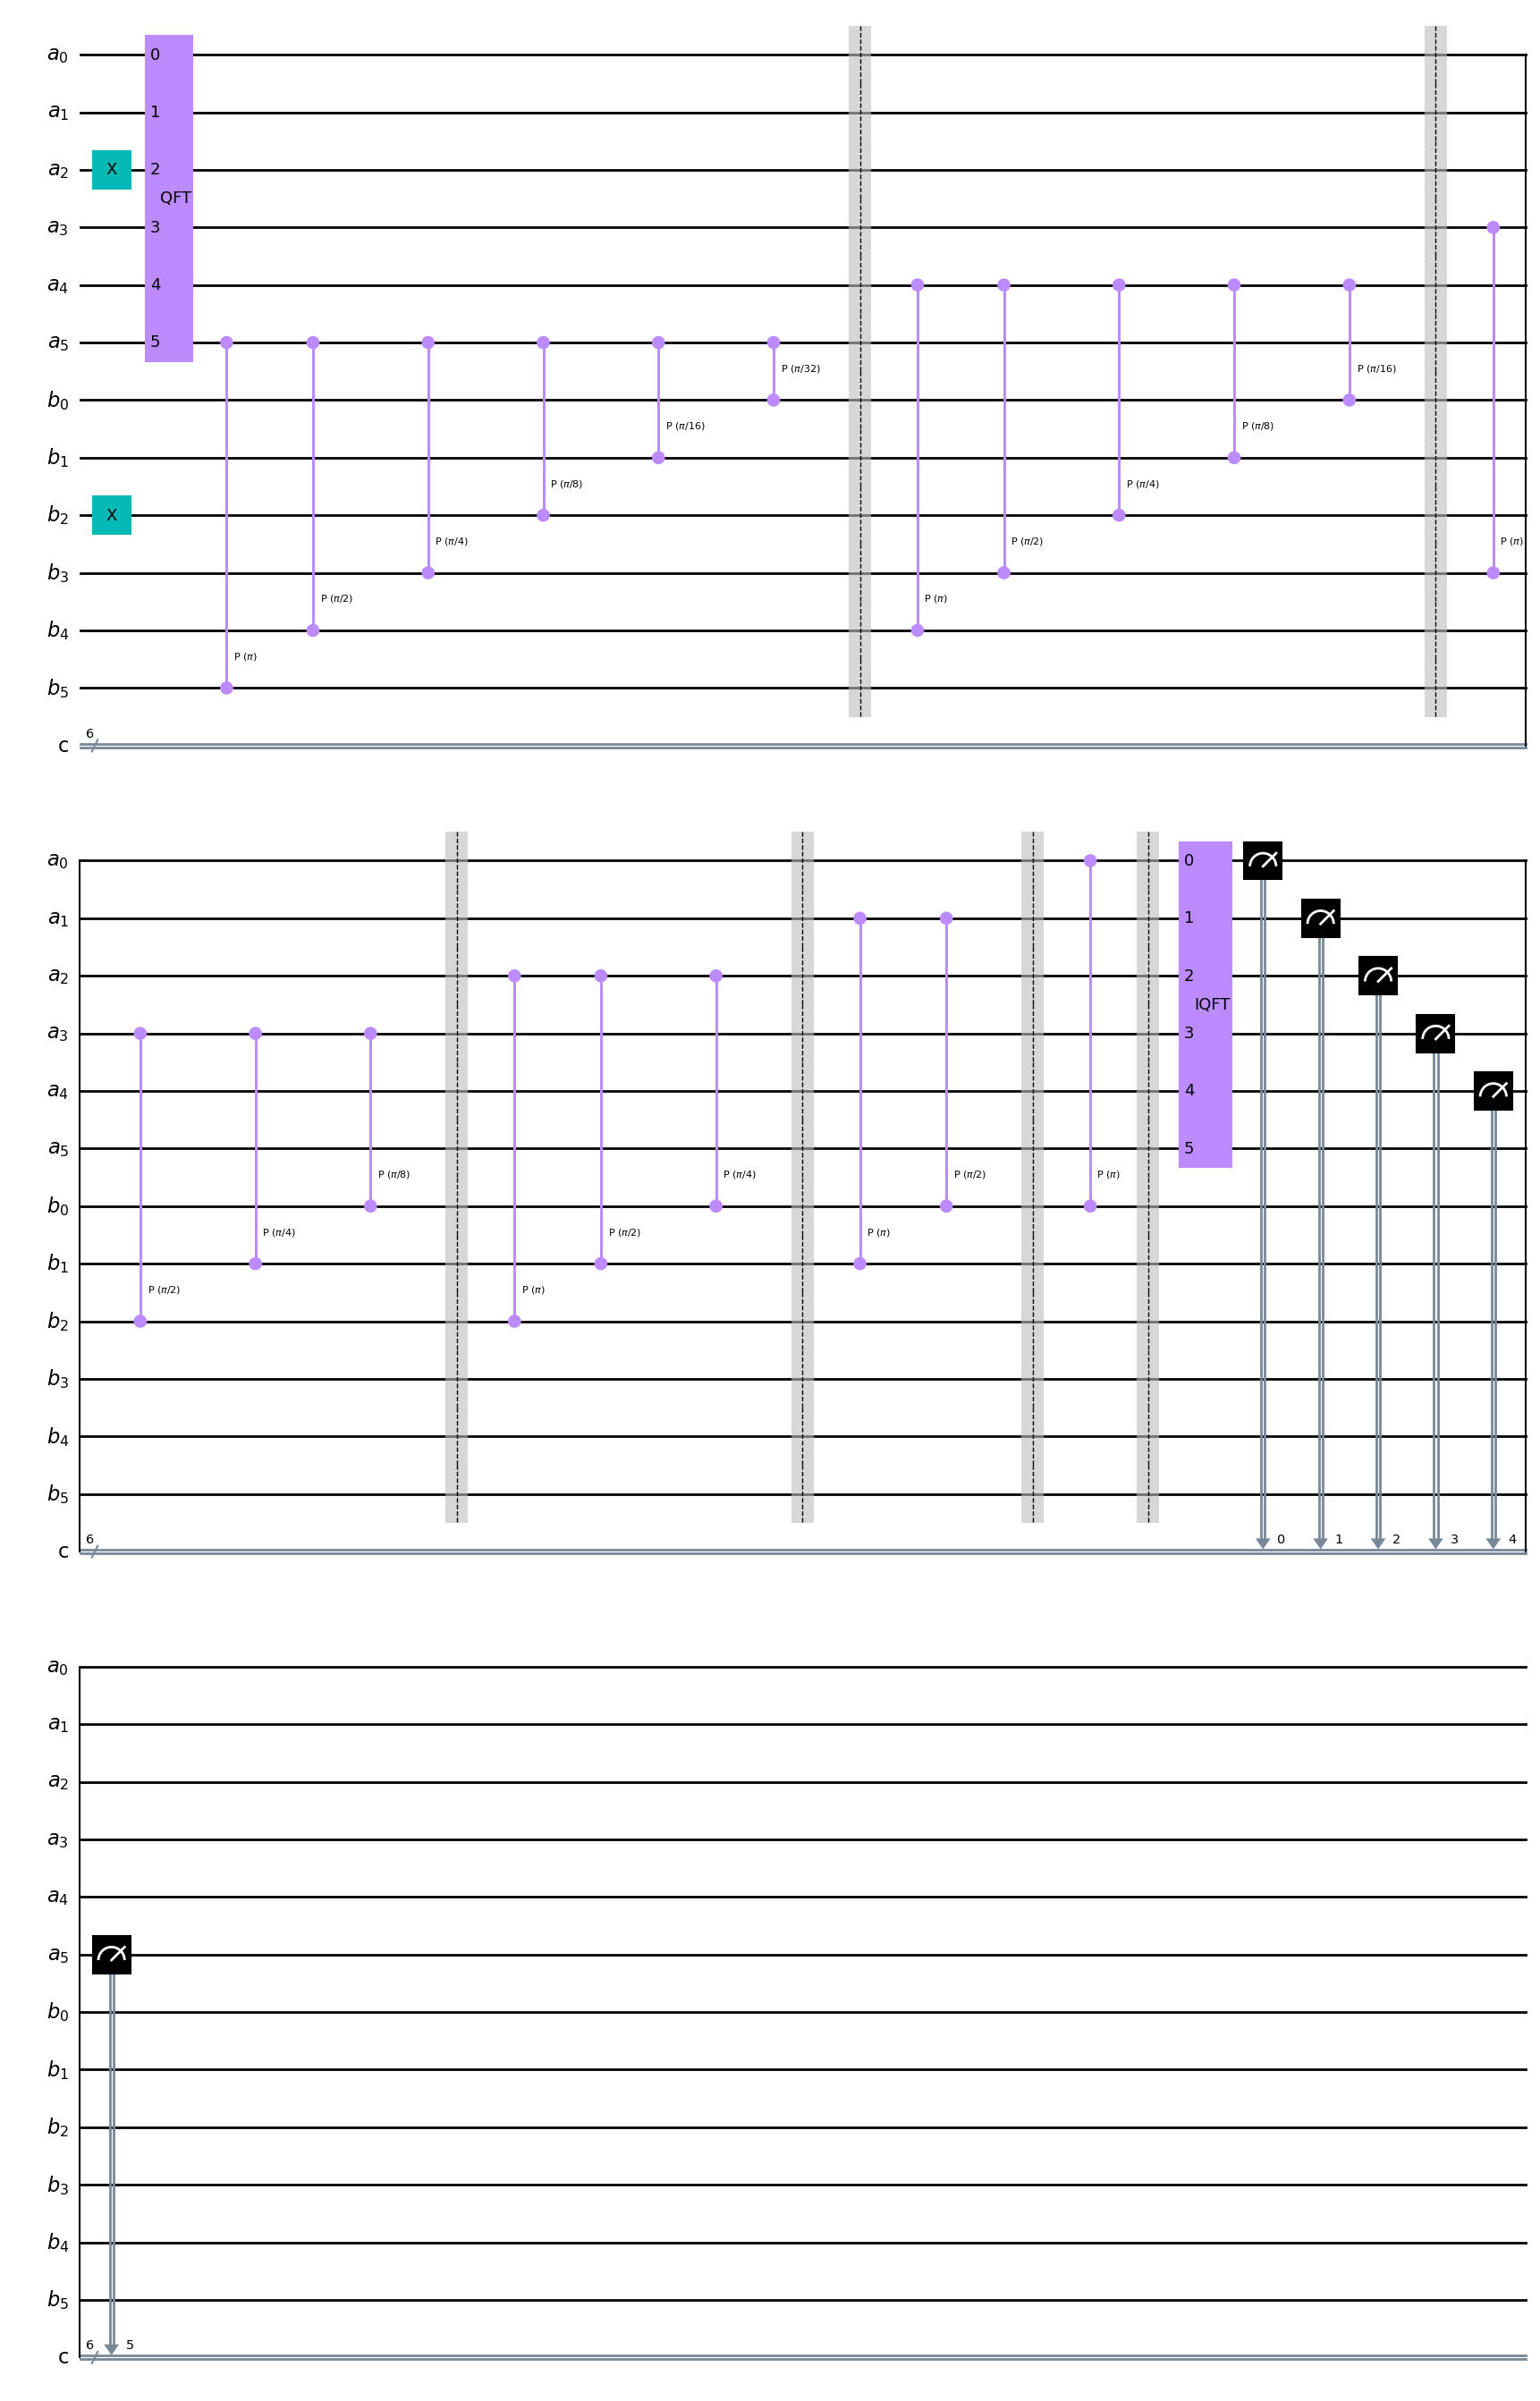

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from math import pi

simulator = AerSimulator()

def inpt(opr) :
    while True:
        try:
            n1, n2 = [bin(int(input(f"Give number {i}: "))).replace('0b', '') for i in range(1, 3)]
            break
        except:
            print("Invalid input. Please try again!")
    
    swap = False
    
    if opr in ('-', '*') and int(n2, 2) > int(n1, 2) :
        n1, n2 = n2, n1
        swap = True
    
    ln1, ln2 = len(n1), len(n2)
    d = max(ln1, ln2)

    if opr == '*' :
        n1, n2 = n1.zfill(2*d), n2.zfill(2*d)
    else :
        n1, n2 = n1.zfill(d+1), n2.zfill(d+1) 
    
    return n1, n2, len(n1), len(n2), swap


def initCirc(n1, n2, ln1, ln2, opr) :
    a = QuantumRegister(ln1, 'a')
    if opr == '*' :
        b = QuantumRegister(ln1, 'b')
    else :
        b = QuantumRegister(ln2, 'b')
    c = ClassicalRegister(ln1, 'c')
    qc = QuantumCircuit(a, b, c)

    for i in range(ln1):
        if n1[i] == "1":
            qc.x(a[ln1-(i+1)])
    if opr == '*' :
        for i in range(ln1):
            if n1[i] == "1":
                qc.x(b[ln1-(i+1)])
    else :
        for i in range(ln2):
            if n2[i] == "1":
                qc.x(b[ln2-(i+1)])
    
    return a, b, qc


def calc(n1, n2, ln1, ln2, opr):
    a, b, qc = initCirc(n1, n2, ln1, ln2, opr)
        
    if opr == '-' : pie = -pi
    else : pie = pi

    qc.append(QFT(ln1, do_swaps=False), range(ln1))

    if opr == '*' :
        for i in range(int(n2, 2) - 1) :
            qc = addPhase(a, b, ln1, pie, qc)
    else :
        qc = addPhase(a, b, ln1, pie, qc)

    qc.append(QFT(ln1, do_swaps=False, inverse=True), range(ln1))

    qc.measure(range(ln1), range(ln1))
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    for key in counts:
        output = key
    return output, qc


def addPhase(a, b, ln1, pie, qc) :

    for i in range(ln1-1, -1, -1) :
        for j in range(i+1) :
            qc.cp(pie/2**j, b[i-j], a[i])
        qc.barrier()
    
    return qc


while True :
    opr = input('''What would you like to do?\n
    1) + for addition\n
    2) - for subtraction\n
    3) * for multiplication\n
    Choose (+, - or *): ''')

    match opr:
        case '+' | '-' | '*' :
            n1, n2, ln1, ln2, swap = inpt(opr)
            result, qc = calc(n1, n2, ln1, ln2, opr)
            sgn = ''
            if swap and opr == '-':
                n1, n2 = n2, n1
                sgn = '-'
            print(f"{int(n1, 2)} {opr} {int(n2, 2)} = {sgn}{int(result, 2)}")
            display(qc.draw('mpl'))
            break
        case _:
            print("Invalid input. Please choose again!")